In [277]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, PoissonRegressor, LinearRegression

import sys
sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
from models.fit_model import MODEL_FITTING
from models.testing import EVALUATION

In [278]:
tester = EVALUATION("stats")

num_permutations = 100

In [ ]:
b = 1
n_weights = 10
c = (n_weights,1)
splits = [1,2,3,4,5]
#n_weights += 1

#path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
#path_sklearn = "../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_25-14_18_11/"
alphas = [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1, 1.0]

#channels = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 14, 14, 14, 14, 16, 16, 36, 36, 40]
channels = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 16, 16, 36, 36, 40, 57, 57, 57, 58, 58, 58, 59, 60, 61, 61, 61, 63, 63, 64, 79, 79, 79, 80, 80, 80]
#units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 38, 39, 40, 41, 44, 45, 69, 70, 83]
units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 44, 45, 69, 70, 83, 96, 97, 98, 101, 102, 103, 107, 112, 116, 117, 118, 125, 126, 129, 142, 143, 144, 150, 151, 152]
n_channels = len(channels)
n_splits = len(splits)
n_units = len(units)

In [285]:
buffer_size = 15
splits = [1,2,3,4,5]
#splits = [1]
bin_size = b
c = (n_weights, 1)
spike_type = "SUA"
spike_combo = "sumExt"
origin = 'zscored'

#cscs = "channels_57-80"
cscs = "channels_5-40"

lfp_path = f'../data_prep/data/{spike_type}/{cscs}/pat66_lfps{spike_type}_df_{origin}_c{c}_b{bin_size}'
spike_path = f'../data_prep/data/{spike_type}/{cscs}/pat66_spikes{spike_type}_df_b{bin_size}_c{c}'


In [281]:
trials = []
for a in alphas: 
    csc = "5-40"
    path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
    L1_trial_df1 = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df1 = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    
    csc = "57-80"
    path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
    L1_trial_df2 = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df2 = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    
    
    L1_trial_df = pd.DataFrame({
        "costs" : np.mean([L1_trial_df1.costs, L1_trial_df2.costs], axis=0),
        "theta" : np.concatenate(
            [np.array(L1_trial_df1.theta.values.tolist()), 
             np.array(L1_trial_df2.theta.values.tolist())
            ], axis=1).tolist(),
        "losses" : np.concatenate(
            [np.array(L1_trial_df1.losses.values.tolist()), 
             np.array(L1_trial_df2.losses.values.tolist())
            ], axis=1).tolist(),
        "preds" : np.concatenate(
            [np.array(L1_trial_df1.preds.values.tolist()), 
             np.array(L1_trial_df2.preds.values.tolist())
            ], axis=1).tolist()
    })
    
    
    L2_trial_df = pd.DataFrame({
        "costs" : np.mean([L2_trial_df1.costs, L2_trial_df2.costs], axis=0),
        "theta" : np.concatenate(
            [np.array(L2_trial_df1.theta.values.tolist()), 
             np.array(L2_trial_df2.theta.values.tolist())
            ], axis=1).tolist(),
        "losses" : np.concatenate(
            [np.array(L2_trial_df1.losses.values.tolist()), 
             np.array(L2_trial_df2.losses.values.tolist())
            ], axis=1).tolist(),
        "preds" : np.concatenate(
            [np.array(L2_trial_df1.preds.values.tolist()), 
             np.array(L2_trial_df2.preds.values.tolist())
            ], axis=1).tolist()
    })
    
    
    L1_trial_exp_df = pd.DataFrame({
        "losses [NLL]" : np.array(L1_trial_df["losses"].values.tolist()).flatten(), 
        "costs [NLL]" : np.array(L1_trial_df["preds"].values.tolist()).flatten(),
        "theta" : np.array(L1_trial_df.theta.values.tolist()).reshape(-1,11).tolist(),
        "channel" : np.array(channels * n_splits),
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(units * n_splits),
        "alpha" : a, 
        "regularization" : "L1"
    })
    
    L2_trial_exp_df = pd.DataFrame({
        "losses [NLL]" : np.array(L2_trial_df["losses"].values.tolist()).flatten(), 
        "costs [NLL]" : np.array(L2_trial_df["preds"].values.tolist()).flatten(), 
        "theta" : np.array(L2_trial_df.theta.values.tolist()).reshape(-1,11).tolist(),
        "channel" : np.array(channels * n_splits),
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(units * n_splits),
        "alpha" : a, 
        "regularization" : "L2"
    })
    
    
    trial_exp_df = pd.concat([L1_trial_exp_df, L2_trial_exp_df], ignore_index=True)
    
    trials.append(trial_exp_df)

exp_df = pd.concat(trials, ignore_index=True)
exp_df.head()

,losses [NLL],costs [NLL],theta,channel,splits,unit,alpha,regularization
0,0.020312,0.020915,"[-5.823059644516378, 0.1512515962583794, -0.05...",5,1,8,0.0,L1
1,0.007911,0.009677,"[-6.913669209715884, 0.231572821666999, -0.061...",5,1,9,0.0,L1
2,0.001621,0.002980,"[-8.803595493565787, 0.10032885713535432, -0.0...",5,1,10,0.0,L1
3,0.002373,0.002496,"[-8.281006076737224, 0.709208042298998, -0.299...",6,1,12,0.0,L1
4,0.001565,0.001754,"[-8.744480044269062, -0.35618397665991947, 0.1...",9,1,17,0.0,L1


In [282]:
als = {}
for u in units:
    a = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=1).argmin()
    l = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=0).argmin()
    #print(u, l, alphas[a])
    #ls = f"L{l+1}" if a>0.0 else "--"
    als.update({f"{u}": [l, alphas[a]]})
#als = np.array(als)
print(als)

{'8': [0, 0.0], '9': [0, 0.0], '10': [0, 0.0], '12': [0, 0.0], '17': [0, 0.0], '23': [0, 0.0], '26': [0, 0.0], '29': [0, 0.0], '31': [1, 0.0], '32': [1, 0.0], '33': [0, 0.0], '44': [0, 0.0], '45': [0, 0.0], '69': [0, 0.0004], '70': [0, 0.0002], '83': [0, 0.0], '96': [0, 0.0], '97': [0, 0.0001], '98': [0, 0.0], '101': [0, 0.0001], '102': [0, 0.0], '103': [0, 0.0], '107': [0, 0.0], '112': [0, 0.0001], '116': [0, 0.0001], '117': [0, 0.0], '118': [0, 0.0], '125': [0, 0.0001], '126': [0, 0.0], '129': [0, 0.0], '142': [0, 0.0], '143': [0, 0.0], '144': [0, 0.0], '150': [0, 0.0], '151': [0, 0.0], '152': [0, 0.0]}


In [286]:
if cscs=="channels_5-40": 
    test_df = exp_df.iloc[np.array(exp_df.channel<45)]
elif cscs=="channels_57-80":
    test_df = exp_df.iloc[np.array(exp_df.channel>45)]
test_df.head()

,losses [NLL],costs [NLL],theta,channel,splits,unit,alpha,regularization
0,0.020312,0.020915,"[-5.823059644516378, 0.1512515962583794, -0.05...",5,1,8,0.0,L1
1,0.007911,0.009677,"[-6.913669209715884, 0.231572821666999, -0.061...",5,1,9,0.0,L1
2,0.001621,0.002980,"[-8.803595493565787, 0.10032885713535432, -0.0...",5,1,10,0.0,L1
3,0.002373,0.002496,"[-8.281006076737224, 0.709208042298998, -0.299...",6,1,12,0.0,L1
4,0.001565,0.001754,"[-8.744480044269062, -0.35618397665991947, 0.1...",9,1,17,0.0,L1


In [287]:
permutation_test_results_40 = tester.permutation_testing_per_neuron(
    test_df,
    als,
    lfp_path, 
    spike_path,
    num_permutations
)


>>>>>>>>> Start Split 1

--- Unit 8 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 9 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 10 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 12 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 17 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 23 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 26 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 29 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 31 - alpha 0.0 - L2 ---
p = 0.009900990099009901

--- Unit 32 - alpha 0.0 - L2 ---
p = 0.009900990099009901

--- Unit 33 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 44 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 45 - alpha 0.0 - L1 ---
p = 0.27722772277227725

--- Unit 69 - alpha 0.0004 - L1 ---
p = 0.009900990099009901

--- Unit 70 - alpha 0.0002 - L1 ---
p = 0.009900990099009901

--- Unit 83 - alpha 0.0 - L1 ---
p = 0.009900990099009901

>>>>>>>>> Start Split 2

--

In [284]:
permutation_test_results_80 = tester.permutation_testing_per_neuron(
    test_df,
    als,
    lfp_path, 
    spike_path,
    num_permutations
)


>>>>>>>>> Start Split 1

--- Unit 96 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 97 - alpha 0.0001 - L1 ---
p = 0.31683168316831684

--- Unit 98 - alpha 0.0 - L1 ---
p = 1.0

--- Unit 101 - alpha 0.0001 - L1 ---
p = 0.009900990099009901

--- Unit 102 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 103 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 107 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 112 - alpha 0.0001 - L1 ---
p = 0.0297029702970297

--- Unit 116 - alpha 0.0001 - L1 ---
p = 0.009900990099009901

--- Unit 117 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 118 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 125 - alpha 0.0001 - L1 ---
p = 0.44554455445544555

--- Unit 126 - alpha 0.0 - L1 ---
p = 0.504950495049505

--- Unit 129 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 142 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 143 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 144 - alpha 0.0 -

In [12]:
permutation_test_results_40 = tester.permutation_testing_per_neuron(
    test_df,
    als,
    lfp_path, 
    spike_path,
    num_permutations
)


>>>>>>>>> Start Split 1

--- Unit 8 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 9 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 10 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 12 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 17 - alpha 0.0 - L1 ---
p = 0.1188118811881188

--- Unit 23 - alpha 0.0 - L1 ---
p = 0.039603960396039604

--- Unit 26 - alpha 0.0 - L1 ---
p = 0.3465346534653465

--- Unit 29 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 31 - alpha 0.0 - L2 ---
p = 0.009900990099009901

--- Unit 32 - alpha 0.0 - L2 ---
p = 0.009900990099009901

--- Unit 33 - alpha 0.0 - L1 ---
p = 0.04950495049504951

--- Unit 44 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 45 - alpha 0.0 - L1 ---
p = 0.8118811881188119

--- Unit 69 - alpha 0.0004 - L1 ---
p = 0.009900990099009901

--- Unit 70 - alpha 0.0002 - L1 ---
p = 0.009900990099009901

--- Unit 83 - alpha 0.0 - L1 ---
p = 0.0594059405940594

>>>>>>>>> Start Split 2

--- Unit 8

In [15]:
permutation_test_results_80 = tester.permutation_testing_per_neuron(
    test_df,
    als,
    lfp_path, 
    spike_path,
    num_permutations
)


>>>>>>>>> Start Split 1

--- Unit 96 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 97 - alpha 0.0001 - L1 ---
p = 0.3069306930693069

--- Unit 98 - alpha 0.0 - L1 ---
p = 1.0

--- Unit 101 - alpha 0.0001 - L1 ---
p = 0.009900990099009901

--- Unit 102 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 103 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 107 - alpha 0.0 - L1 ---
p = 0.09900990099009901

--- Unit 112 - alpha 0.0001 - L1 ---
p = 0.297029702970297

--- Unit 116 - alpha 0.0001 - L1 ---
p = 0.009900990099009901

--- Unit 117 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 118 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 125 - alpha 0.0001 - L1 ---
p = 1.0

--- Unit 126 - alpha 0.0 - L1 ---
p = 1.0

--- Unit 129 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 142 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 143 - alpha 0.0 - L1 ---
p = 0.009900990099009901

--- Unit 144 - alpha 0.0 - L1 ---
p = 0.009900990099009901


In [288]:
p_vals_40 = []
nll_test_40 = []
nll_permut_40 = []

for x_s in permutation_test_results_40: 
    p_vals_s = []
    nll_test_s = []
    nll_permut_s = []
    
    for p, nll_t, nll_p in x_s: 
        p_vals_s.append(p)
        nll_test_s.append(nll_t)
        nll_permut_s.append(np.array(nll_p).flatten())
            
    p_vals_s = np.array(p_vals_s)
    nll_test_s = np.array(nll_test_s)
    nll_permut_s = np.array(nll_permut_s)
        
    p_vals_40.append(p_vals_s)
    nll_test_40.append(nll_test_s)
    nll_permut_40.append(nll_permut_s)
    
p_vals_80 = []
nll_test_80 = []
nll_permut_80 = []
    
for x_s in permutation_test_results_80: 
    p_vals_s = []
    nll_test_s = []
    nll_permut_s = []
    
    for p, nll_t, nll_p in x_s: 
        p_vals_s.append(p)
        nll_test_s.append(nll_t)
        nll_permut_s.append(np.array(nll_p).flatten())
        
    p_vals_s = np.array(p_vals_s)
    nll_test_s = np.array(nll_test_s)
    nll_permut_s = np.array(nll_permut_s)
        
    p_vals_80.append(p_vals_s)
    nll_test_80.append(nll_test_s)
    nll_permut_80.append(nll_permut_s)
    
p_vals = np.concatenate([
    np.vstack(p_vals_40).mean(axis=0),
    np.vstack(p_vals_80).mean(axis=0)
])
nll_test = np.concatenate([
    np.vstack(nll_test_40).mean(axis=0),
    np.vstack(nll_test_80).mean(axis=0)
])
nll_permut = np.hstack([
    np.array(nll_permut_40),
    np.array(nll_permut_80)
]).mean(axis=0)

In [289]:
p_vals

array([0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.01980198,
       0.00990099, 0.01188119, 0.00990099, 0.00990099, 0.00990099,
       0.01188119, 0.00990099, 0.11089109, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.65940594, 0.58613861, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.1980198 , 0.15247525,
       0.00990099, 0.00990099, 0.45148515, 0.11089109, 0.00990099,
       0.00990099, 0.00990099, 0.0970297 , 0.00990099, 0.00990099,
       0.01386139])

In [290]:
print(nll_permut.shape)
nll_permut_df = pd.DataFrame({
    "NLL" : nll_permut.flatten(),
    "permutation ID" : np.array(list(range(num_permutations)) * nll_permut.shape[0]), 
    "unit" : np.repeat(units, num_permutations)
})
nll_permut_df.head()

(36, 100)


,NLL,permutation ID,unit
0,0.020733,0,8
1,0.020726,1,8
2,0.020732,2,8
3,0.020730,3,8
4,0.020730,4,8


In [291]:
print(nll_test.shape)
nll_test_df = pd.DataFrame({
    "NLL" : nll_test.flatten(),
    "unit" : np.array(units)
})
nll_test_df.head()

(36,)


,NLL,unit
0,0.020547,8
1,0.008356,9
2,0.001788,10
3,0.002301,12
4,0.001616,17


In [292]:
nll_test_df.iloc[np.array(nll_test_df.unit<9)]

,NLL,unit
0,0.020547,8


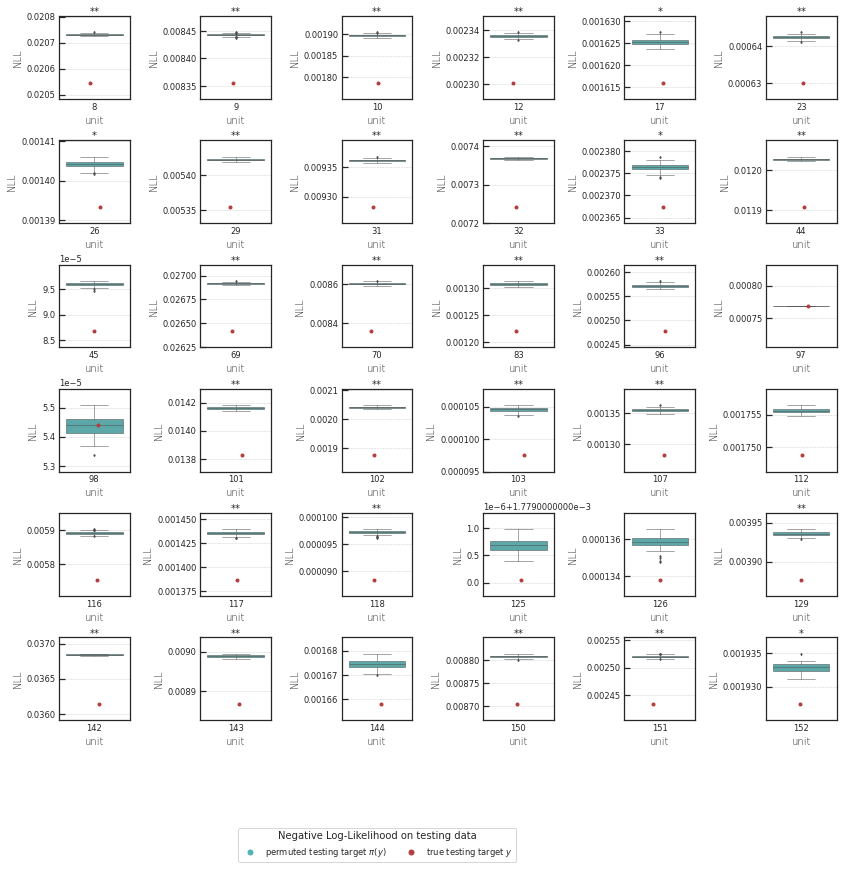

In [324]:
fig7, axs = pltr.plot_random_test_results(
    p_vals,
    nll_permut_df, 
    nll_test_df, 
    units
)

plt.subplots_adjust(
    left=0.09, right=0.99, bottom=0.16, top=0.975
)

fig7.savefig('plots/plot7.png')
fig7.savefig('plots/plot7.pdf')

In [323]:
import matplotlib
import seaborn as sns
import matplotlib.lines as mlines
class PLOTTER(): 
    
    def __init__(self):
        
        ### define colors ##
        self.blue2    = "#2e518c"
        self.blue3    = "#5079b3"
        self.blue4    = "#7da7d9"
        self.green1   = "#146614"
        self.green2   = "#2e8c2e"
        self.green3   = "#50b350"
        self.green4   = "#7dd97d"
        self.green5   = "#b3ffb3"
        self.red1     = "#660000"
        self.red2     = "#8c1919"
        self.red3     = "#b33e3e"
        self.red4     = "#d97272"
        self.red5     = "#ffb3b3"
        self.magenta1 = "#581466"
        self.magenta2 = "#762e8c"
        self.magenta3 = "#9650b3"
        self.magenta4 = "#b87dd9"
        self.magenta5 = "#dfb3ff"
        self.orange1  = "#b34e0b"
        self.orange2  = "#c67322"
        self.orange3  = "#d99a3d"
        self.orange4  = "#ecc05c"
        self.orange5  = "#ffe480"
        self.cyan1    = "#146666"
        self.cyan2    = "#2e8c8c"
        self.cyan3    = "#50b3b3"
        self.cyan4    = "#7dd9d9"
        self.cyan5    = "#b3ffff"
        self.gray1    = "#4d4d4d"
        self.gray2    = "#6c6c6c"
        self.gray3    = "#8c8c8c"
        self.gray4    = "#acacac"
        self.gray5    = "#cccccc"
        
        palette = "viridis"
        sns.set_palette(palette)
        
        # Plot customizations
        self.tic_font_size = "x-small"
        self.label_font_size = "small"

        self.rc = {
            "figure.figsize":(10.75, 3.75),
            "font.family":"sans serif", 
            "text.usetex":False,
            "xtick.labelsize":self.tic_font_size,
            "ytick.labelsize":self.tic_font_size,
            "axes.axisbelow":True,
            "lines.linewidth":0.8, 
            "legend.fancybox":True, 
            # "text.usetex" : True, 
            # "pdf.fonttype" : 42
        }

        matplotlib.rcParams["lines.linewidth"] = 0.8
        matplotlib.rcParams["legend.fancybox"] = True
        # matplotlib.rcParams["pdf.fonttype"] = 42
        # matplotlib.rcParams["ps.fonttype"] = 42

        # matplotlib.rcParams["text.usetex"] = True

        sns.set(rc=self.rc)
        sns.set_style('white')

        plt.tight_layout()
        
        
    def plot_random_test_results(
        self, 
        p_vals,
        nll_permut_df, 
        nll_test_df, 
        units
    ):
        
        ## set up frame for data ##
        fig, axs = plt.subplots(6,6, figsize=(12,12))
        bp_col = self.cyan3
        dot_col = self.red3

        for i in range(36):
            k = i // 6
            j = i % 6

            u = units[i]
            p_val = p_vals[i]

            axs[k,j].grid(linewidth=0.5, linestyle="dashed", zorder=0)

            ## fig prep ##
            axs[k,j].tick_params(
                    direction = "in", 
                    bottom = False, top = False,
                    left = True, right = False,
                    zorder = 1
            )
            axs[k,j].set_xlabel('', fontweight='light', fontsize=self.label_font_size)
            axs[k,j].set_ylabel('', fontweight='light', fontsize=self.label_font_size)

            sns.boxplot(
                ax=axs[k,j], 
                data=nll_permut_df.iloc[np.array(nll_permut_df.unit==u)], 
                y="NLL", x="unit", 
                color=bp_col, 
                linewidth=0.5, fliersize=1.5
            )
            
            sns.stripplot(
                ax=axs[k,j], 
                data=nll_test_df.iloc[np.array(nll_test_df.unit==u)], 
                y="NLL", x="unit", 
                color=dot_col, 
                size=4
            )

            star = ""
            if p_val < 0.05:
                star = "*"
            if p_val < 0.01:
                star = "**"
            if p_val < 0.001:
                star = "***"

            axs[k,j].set_title(star, fontsize=self.label_font_size,pad=1)
            y_lim = axs[k,j].get_ylim()
            add_y = (y_lim[1] - y_lim[0])/4
            axs[k,j].set_ylim(y_lim[0]-add_y, y_lim[1]+add_y)
                        
        
        ## legend for brain regions ##
        p_handlers = []
        p_handlers.append(
            mlines.Line2D([], [], color=bp_col, marker='.', linestyle='None',
                      markersize=10, label="permuted testing target $\pi(y)$")
        )
        
        p_handlers.append(
            mlines.Line2D([], [], color=dot_col, marker='.', linestyle='None',
                      markersize=10, label="true testing target $y$")
        )
        
        plt.legend(handles=p_handlers, ncol=len(p_handlers), 
                   fontsize=self.tic_font_size, 
                   loc="upper center", bbox_to_anchor=(-5.5,-1.25),
                   title="Negative Log-Likelihood on testing data", title_fontsize=self.label_font_size)         
            
        plt.subplots_adjust(wspace=1.0, hspace=0.5)
        return fig, axs
        
pltr = PLOTTER()

<Figure size 774x270 with 0 Axes>

In [75]:
np.array(permutation_test_results_80[0][0][2]).flatten()

array([0.02434934, 0.02427827, 0.02434906, 0.02426983, 0.02427989,
       0.02431495, 0.02434256, 0.02428942, 0.02426018, 0.02432014,
       0.02434454, 0.02430521, 0.0243225 , 0.02431013, 0.02428497,
       0.0243091 , 0.02429709, 0.02426152, 0.02434893, 0.02433993,
       0.02428743, 0.02429537, 0.02430441, 0.02432743, 0.02426565,
       0.02431869, 0.02429987, 0.02429248, 0.02430486, 0.02429151,
       0.02430718, 0.02431447, 0.02429224, 0.02431931, 0.02430392,
       0.02434555, 0.024318  , 0.02432739, 0.02435128, 0.02430865,
       0.02429754, 0.02432497, 0.02430003, 0.02431048, 0.02428477,
       0.02428876, 0.02426661, 0.0242995 , 0.02430452, 0.02433511,
       0.02426906, 0.0242575 , 0.02429745, 0.02430223, 0.02430818,
       0.02432937, 0.02429787, 0.02432157, 0.02432192, 0.02432662,
       0.0243352 , 0.02432491, 0.02430464, 0.02429486, 0.02431418,
       0.02430049, 0.02431887, 0.02428111, 0.02427797, 0.02432732,
       0.02431196, 0.0242929 , 0.02429128, 0.02428963, 0.02430

In [14]:
ptr_40.append(permutation_test_results_57)

In [24]:
ptr_40[0][0][1]

[[0.03225806451612903, 0.1913090098472767, 0.19166011872418337],
 [0.03225806451612903, 0.1913090098472767, 0.19171349869804633],
 [0.03225806451612903, 0.1913090098472767, 0.19165763931756064],
 [0.03225806451612903, 0.1913090098472767, 0.19170560002121875],
 [0.03225806451612903, 0.1913090098472767, 0.19167736841135502],
 [0.03225806451612903, 0.1913090098472767, 0.1917105264507698],
 [0.03225806451612903, 0.1913090098472767, 0.1916520257554613],
 [0.03225806451612903, 0.1913090098472767, 0.19167997092953026],
 [0.03225806451612903, 0.1913090098472767, 0.19173379258251846],
 [0.03225806451612903, 0.1913090098472767, 0.19164855677878542],
 [0.03225806451612903, 0.1913090098472767, 0.1916687363543083],
 [0.03225806451612903, 0.1913090098472767, 0.19161114526839854],
 [0.03225806451612903, 0.1913090098472767, 0.1917115361066841],
 [0.03225806451612903, 0.1913090098472767, 0.19169180796588078],
 [0.03225806451612903, 0.1913090098472767, 0.19165687169064882],
 [0.03225806451612903, 0.1913

In [99]:
units_s.sort()
units_s

[8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 44, 45, 69, 70, 83]

In [102]:
test_df = exp_df.iloc[np.array(exp_df.unit<45)]
test_df_s = test_df.iloc[np.array(test_df.splits==1)]
units_s = list(set(test_df_s.unit))
test_df = test_df_s.iloc[np.array(test_df_s.unit==31)]
test_df = test_df.iloc[np.array(test_df.alpha==0.0)]
test_df = test_df.iloc[np.array(test_df.regularization==f"L{1+1}")]
print(np.array(test_df.theta.values.tolist())[0])
test_df.head(20)

[-6.72843593  0.26372974 -0.12157888 -0.20291802 -0.1007132  -0.06258857
  0.35770585  0.22755795  0.3411771  -1.37402383  0.75230404]


,losses [NLL],costs [NLL],theta,channel,splits,unit,alpha,regularization
188,0.009301,0.008982,"[-6.728435933643966, 0.263729741062471, -0.121...",13,1,31,0.0,L2


In [101]:
test_df.iloc[np.array(test_df.splits==2)]

,losses [NLL],costs [NLL],theta,channel,splits,unit,alpha,regularization


In [51]:
als = {}
for u in units:
    a = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=1).argmin()
    l = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=0).argmin()
    #print(u, l, alphas[a])
    #ls = f"L{l+1}" if a>0.0 else "--"
    als.update({f"{u}": [l, alphas[a]]})
#als = np.array(als)
print(als)

{'8': [0, 0.0], '9': [0, 0.0], '10': [0, 0.0], '12': [0, 0.0], '17': [0, 0.0], '23': [0, 0.0], '26': [0, 0.0], '29': [0, 0.0], '31': [1, 0.0], '32': [1, 0.0], '33': [0, 0.0], '44': [0, 0.0], '45': [0, 0.0], '69': [0, 0.0004], '70': [0, 0.0002], '83': [0, 0.0], '96': [0, 0.0], '97': [0, 0.0001], '98': [0, 0.0], '101': [0, 0.0001], '102': [0, 0.0], '103': [0, 0.0], '107': [0, 0.0], '112': [0, 0.0001], '116': [0, 0.0001], '117': [0, 0.0], '118': [0, 0.0], '125': [0, 0.0001], '126': [0, 0.0], '129': [0, 0.0], '142': [0, 0.0], '143': [0, 0.0], '144': [0, 0.0], '150': [0, 0.0], '151': [0, 0.0], '152': [0, 0.0]}


In [ ]:
def permutation_testing_per_neuron(
    self, 
    test_df,
    best_costs,
    lfp_path, 
    spike_path,
    n_permuts
):
    nll_perm = []
    ### for all splits ###
    for s in set(test_df.splits):
        X_df, y_df = None, None
        [(X_df, y_df)] = self.load_split_data(
            [s], 
            lfp_path, 
            spike_path
        )
        print(f"\n>>>>>>>>> Start Split {s}")
        test_df_s = test_df.iloc[np.array(test_df.splits==s)]
        
        units_s = list(set(test_df_s.unit))
        units_s.sort()
        
        nll_perm_s = []
        # for all neurons
        for n in range(len(units_s)): 
            u = units_s[n]
            l, alpha = best_costs[f"{u}"]
            
            print(f"\n--- Unit {u} - alpha {alpha} - L{l+1} ---")
            
            ## get data ##
            #X_val = X_df.val_dt[n]
            #y_val = y_df.val_dt[n]
            X_test = X_df.test_dt[n]
            y_test = y_df.test_dt[n]
            
            test_df_s_u = test_df_s.iloc[np.array(test_df_s.unit==u)]
            test_df_s_u = test_df_s_u.iloc[np.array(test_df_s_u.alpha==alpha)]
            test_df_s_u = test_df_s_u.iloc[np.array(test_df_s_u.regularization==f"L{l+1}")]
            
            theta_s_u = np.array(test_df_s_u.theta.values.tolist())[0]
            
            # NLL for testing data # 
            nll_test = self.validate_model(
                X_test, 
                y_test, 
                theta_s_u
            )
            
            # create permutations # 
            # reset seed to ensure that all permutations are equal over units and splits
            np.random.seed(42)   
            test_idx = np.array(range(y_test.size))
            pis = []
            for i in range(n_permuts): 
                np.random.shuffle(test_idx)
                pis.append(test_idx.copy())
                
            nll_perm_u = []
            num_nll_perm_smaller_or_eq_to_test = 0
            for pi in pis: 
                nll_pi = self.validate_model(
                    X_test, 
                    y_test[pi], 
                    theta_s_u
                )
                
                if nll_pi <= nll_test:
                    num_nll_perm_smaller_or_eq_to_test += 1
                    
                p_val_u = (num_nll_perm_smaller_or_eq_to_test+1) / (n_permuts+1)
                
                nll_perm_u.append([p_val_u, nll_test, nll_pi])
                
            
                
            nll_perm_s.append([nll_test, nll_perm_u])
            
        nll_perm.append(nll_perm_s)
        
    return nll_perm
                
            
            
            
            
            
        
        
    

In [28]:
np.random.seed(42)
dt = np.arange(0.0, 0.01, 0.0001)
dt_idx = np.array(range(dt.size))
pis = []
for i in range(3): 
    np.random.shuffle(dt_idx)
    pis.append(dt_idx.copy())
pis

[array([83, 53, 70, 45, 44, 39, 22, 80, 10,  0, 18, 30, 73, 33, 90,  4, 76,
        77, 12, 31, 55, 88, 26, 42, 69, 15, 40, 96,  9, 72, 11, 47, 85, 28,
        93,  5, 66, 65, 35, 16, 49, 34,  7, 95, 27, 19, 81, 25, 62, 13, 24,
         3, 17, 38,  8, 78,  6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68,
        61, 97, 79, 41, 58, 48, 98, 57, 75, 32, 94, 59, 63, 84, 37, 29,  1,
        52, 21,  2, 23, 87, 91, 74, 86, 82, 20, 60, 71, 14, 92, 51]),
 array([59, 65, 67,  8,  4, 55, 51, 15,  6, 77, 89, 82,  2, 46, 78, 48, 16,
        11, 76, 13, 56, 38, 29, 42, 23,  0, 12, 37, 98, 87, 36, 92, 62, 75,
        64, 91, 57, 21, 43, 69, 94, 18, 72, 31, 19, 84, 52, 17, 39, 68, 97,
        53, 86, 88, 61, 74, 47, 73,  5,  9,  7, 79, 27, 35,  1, 45,  3, 54,
        24, 34, 90, 10, 40, 33, 20, 83, 70, 32, 81, 50, 71, 95, 66, 99, 26,
        25, 60, 28, 30, 41, 58, 22, 96, 49, 44, 85, 14, 93, 80, 63]),
 array([39, 98, 25, 99, 78, 77, 72, 38, 83, 49, 19, 12,  7,  2, 56, 52, 84,
        94, 46, 79, 88, 

In [15]:
dt_perm = []
for pi in pis: 
    dt_perm.append(dt[pi])
dt_perm

[array([0.0098, 0.0004, 0.0033, 0.0061, 0.0093, 0.0084, 0.0051, 0.0094,
        0.001 , 0.0088, 0.0009, 0.0054, 0.0056, 0.0072, 0.0074, 0.0042,
        0.0044, 0.0014, 0.0081, 0.0011, 0.0077, 0.0015, 0.0013, 0.0091,
        0.    , 0.0019, 0.004 , 0.008 , 0.0035, 0.0006, 0.0071, 0.0086,
        0.0012, 0.0057, 0.0083, 0.0079, 0.0099, 0.0028, 0.0038, 0.0008,
        0.0064, 0.0055, 0.0076, 0.0025, 0.0082, 0.0067, 0.0089, 0.0001,
        0.0022, 0.0096, 0.0046, 0.0065, 0.0049, 0.007 , 0.0069, 0.0039,
        0.0066, 0.0092, 0.003 , 0.0041, 0.0024, 0.0017, 0.0002, 0.0078,
        0.0032, 0.0031, 0.0062, 0.0059, 0.0052, 0.0073, 0.0023, 0.0036,
        0.0005, 0.0045, 0.0087, 0.0043, 0.0016, 0.0048, 0.0097, 0.0034,
        0.0003, 0.0018, 0.0047, 0.006 , 0.0068, 0.0063, 0.0027, 0.0095,
        0.002 , 0.009 , 0.0026, 0.0007, 0.0053, 0.005 , 0.0037, 0.0029,
        0.0021, 0.0085, 0.0058, 0.0075]),
 array([0.0037, 0.0064, 0.0051, 0.004 , 0.0048, 0.0052, 0.0075, 0.0087,
        0.    , 0.003 